1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy
from scipy.stats import norm

Text(0.5, 1.0, 'Gaussians')

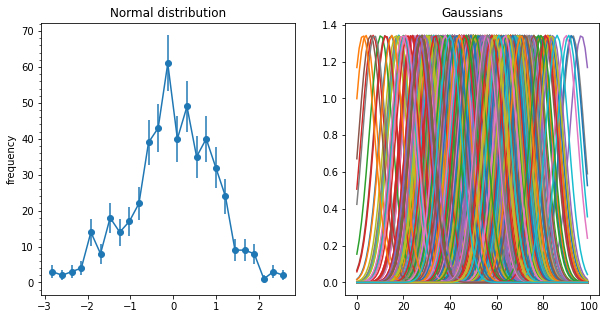

In [2]:
N = 500
mean=0
std=1
x= npr.randn(N)*std+mean
h = np.histogram(x, bins =25)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))


ax1.set_ylabel("frequency")
ax1.set_title("Normal distribution")

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

#display data with errorbars
freq=h[0]
bin_edges=h[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

yerr =np.sqrt(freq)

ax1.scatter(bin_centers,freq)
ax1.errorbar(bin_centers,freq, yerr=yerr, fmt='')

#gaussian plots
xlim= ax1.get_xlim()
xmin=xlim[0]
xmax=xlim[1]
a = np.linspace(xmin,xmax,100)

std_default = 1.06*x.std()*x.size**(-1/5)
std = std_default

gaussians=[]
for i in range(x.size):
    gaussians.append(scipy.stats.norm.pdf(a, x[i], std))
    ax2.plot(gaussians[i])
    
ax2.set_title("Gaussians")


In [3]:
sum_gauss=np.sum(gaussians,axis=0)

498.5922747131326 

112.0784528929386 



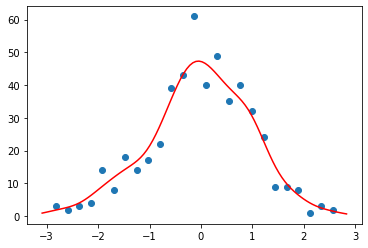

In [4]:
integral_gaussians=scipy.integrate.trapz(sum_gauss,a)
print(integral_gaussians,'\n')
bin_width=(bin_centers[1]-bin_centers[0])
integral_histo=N*bin_width
print(integral_histo,'\n')
sum_gauss_norm=sum_gauss/integral_gaussians*integral_histo
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(bin_centers,freq)
ax.plot(a,sum_gauss_norm,color='red')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [5]:
import pandas as pd
import numpy.random as npr

N=500 #length of dataframe
mu1=np.array([0,0])
sigma1=np.array([3,5])
mu2=np.array([2,1])
sigma2=np.array([1,1])

array1=np.zeros((N,2))
array1[:,0]=npr.randn(N)*sigma1[0]+mu1[0]
array1[:,1]=npr.randn(N)*sigma1[1]+mu1[1]
d1 = pd.DataFrame(array1, columns=['x','y'])

array2=np.zeros((N,2))
array2[:,0]=npr.randn(N)*sigma2[0]+mu2[0]
array2[:,1]=npr.randn(N)*sigma2[1]+mu2[1]
d2 = pd.DataFrame(array2, columns=['x','y'])

d1,d2

(            x          y
 0   -7.640885  -2.256130
 1    2.182929  -3.298717
 2    4.084940   2.893507
 3   -1.668977  -2.872005
 4    3.149196  -8.100704
 ..        ...        ...
 495  6.135569  -3.103466
 496 -1.194547  -2.801817
 497  3.200746 -12.540899
 498 -0.469884   4.382017
 499 -3.801318   3.112524
 
 [500 rows x 2 columns],
             x         y
 0    1.993015  1.265371
 1    4.234381  1.870735
 2    2.123531  0.674859
 3    1.588325  1.408588
 4    0.457493  2.750930
 ..        ...       ...
 495  2.594011  0.720414
 496  1.468252  1.226407
 497  2.469090  0.899501
 498  1.403976  1.080764
 499  1.759010  1.350750
 
 [500 rows x 2 columns])

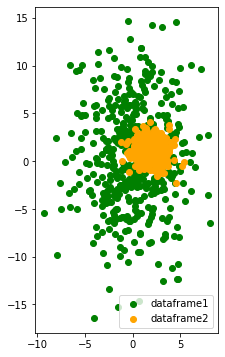

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
ax.scatter(d1['x'],d1['y'],color='green',label='dataframe1')
ax.scatter(d2['x'],d2['y'],color='orange',label='dataframe2')
ax.legend(loc='best')
plt.gca().set_aspect('equal')
plt.show()

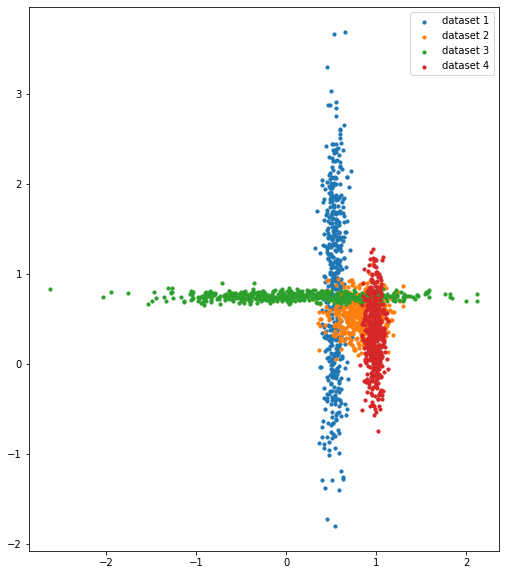

In [7]:
#n>2 categories
n = 4 #number of categories
N=500 #length of each dataframe
mu=npr.rand(n,2)
sigma=npr.rand(n,2)
    
array=np.zeros((N,2,n))

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))

for i in range(n):
    array[:,0,i]= npr.randn(N)*sigma[i,0]+mu[i,0]
    array[:,1,i]= npr.randn(N)*sigma[i,1]+mu[i,1]
    ax.scatter(array[:,0,i],array[:,1,i],label='dataset {}'.format(i+1),marker='o',s=10)
    
ax.legend(loc='best')
plt.gca().set_aspect('equal')
plt.show()

In [8]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [9]:
import seaborn as sns
a=np.load('residuals_261.npy',allow_pickle=True)

df=pd.DataFrame(a.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [10]:
df=df[abs(df['residuals'])<2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


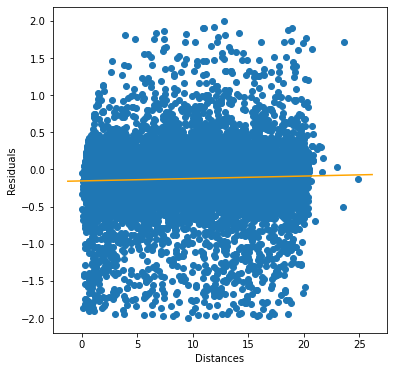

In [11]:
a=scipy.stats.linregress(df['distances'],df['residuals'])
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
ax.scatter(df['distances'],df['residuals'])
x=np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
ax.plot(x,x*a.slope+a.intercept,color='orange')
ax.set_ylabel('Residuals')
ax.set_xlabel('Distances')
plt.show()

In [12]:
ax.get_xlim()

(-2.614499999999998, 27.514499999999973)

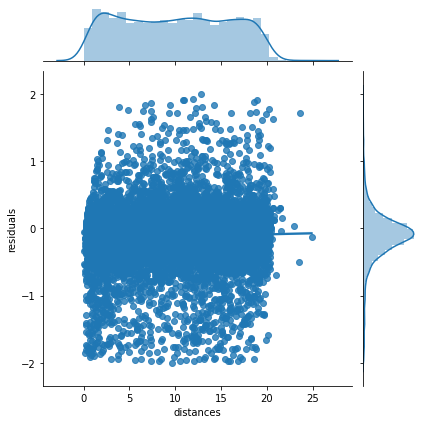

In [13]:
sns.jointplot(x=df['distances'], y=df['residuals'], data=df, kind="reg");

In [14]:
#fill 3 numpy arrays
nbins =40
max_dist=20
step = max_dist/nbins
x=np.arange(step/2,max_dist+step/2,step)

which_bin = np.floor(df['distances']/step)
sums=[]
for b in range(nbins):
    ind = df.index[which_bin.values==b]
    sums.append(df.loc[ind,['residuals']].values)




In [15]:
y=np.zeros(len(sums))
erry=np.zeros(len(sums))

for i in range(len(sums)):
    y[i]=np.mean(sums[i])
    erry[i]=np.std(sums[i])


In [16]:
x, y, erry

(array([ 0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,  4.25,
         4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,
         9.25,  9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25,
        13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75,
        18.25, 18.75, 19.25, 19.75]),
 array([-0.29618398, -0.22775086, -0.1354454 , -0.13389888, -0.19569908,
        -0.15298167, -0.17898971, -0.14996069, -0.13049628, -0.1249259 ,
        -0.13821208, -0.13916177, -0.13866992, -0.07080746, -0.09256696,
        -0.06636934, -0.08697771, -0.11984063, -0.06989322, -0.11205604,
        -0.04947086, -0.03063509, -0.1070975 , -0.09173439, -0.06870476,
        -0.10120115, -0.11963328, -0.15344267, -0.15113699, -0.12786203,
        -0.19449633, -0.076775  , -0.11863617, -0.1661595 , -0.16909908,
        -0.14641605, -0.12476173, -0.12867368, -0.0592575 , -0.04865642]),
 array([0.4504482 , 0.49694179, 0.42483367, 0.43051083, 0.40753291,
        0.44238307, 0.36

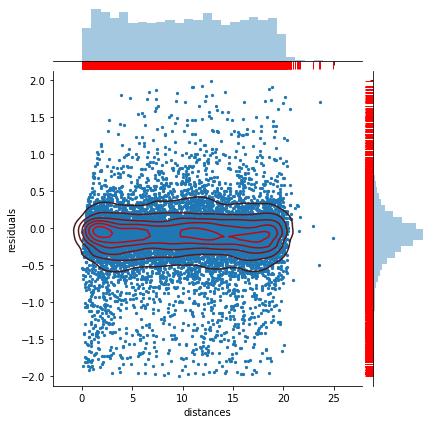

In [17]:
#plot the profile plot on top of the scatter plot
g = sns.jointplot(data=df, x=df['distances'], y=df['residuals'], marker="o", s=5)
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
